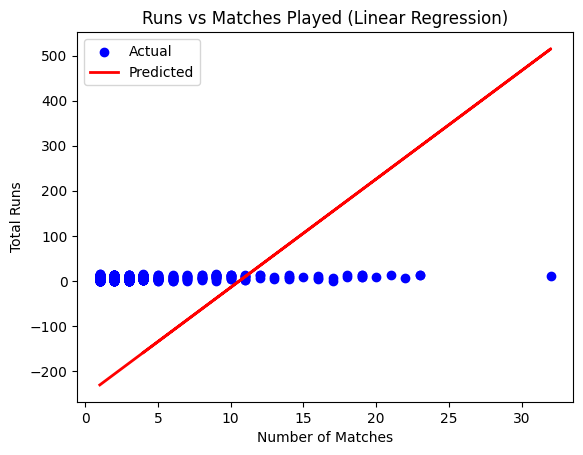

R-squared: -1927.73
RMSE: 195.29
Slope: 24.07 (Runs per additional match)
Intercept: -255.18


c:\Users\muham\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted total runs for 1.0 matches: -231.12


c:\Users\muham\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted total runs for 1.0 matches: -231.12


c:\Users\muham\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted total runs for 10.0 matches: -14.53


c:\Users\muham\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted total runs for 150.0 matches: 3354.60


c:\Users\muham\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted total runs for 100.0 matches: 2151.34


c:\Users\muham\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted total runs for 50.0 matches: 948.08


c:\Users\muham\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted total runs for 25.0 matches: 346.45


c:\Users\muham\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted total runs for 15.0 matches: 105.79


c:\Users\muham\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted total runs for 10.0 matches: -14.53
Exiting...


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Load the data
df = pd.read_csv('ODI data.csv')

# Clean the data
# Replace non-numeric values (like '-') in 'Runs' and 'Mat' with NaN, then drop rows with NaN
df['Runs'] = pd.to_numeric(df['Runs'], errors='coerce')
df['Mat'] = pd.to_numeric(df['Mat'], errors='coerce')
df = df.dropna(subset=['Runs', 'Mat'])  # Drop rows where 'Runs' or 'Mat' is NaN

# Select variables
X = df[['Mat']]  # Independent variable: Matches played
y = df['Runs']   # Dependent variable: Total runs

# Train-test split
train_size = int(0.8 * len(df))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Plot
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Number of Matches')
plt.ylabel('Total Runs')
plt.title('Runs vs Matches Played (Linear Regression)')
plt.legend()
plt.show()

print(f"R-squared: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"Slope: {model.coef_[0]:.2f} (Runs per additional match)")
print(f"Intercept: {model.intercept_:.2f}")

# User input for prediction
while True:
    try:
        matches = float(input("Enter the number of matches played (or 'q' to quit): "))
        if matches < 0:
            print("Number of matches cannot be negative. Try again.")
            continue
        predicted_runs = model.predict([[matches]])[0]
        print(f"Predicted total runs for {matches} matches: {predicted_runs:.2f}")
    except ValueError:
        print("Exiting...")
        break